# Business Problem
###  To predict internet traffic using a time-series forecasting technique to optimize resource allocation. 

In [1]:
#import libraries

import numpy as np
import pandas as pd

#Plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis(EDA)

In [2]:
# import data
dt = pd.read_csv('Website Vistiors Daywise - sheet1.csv')
dt

,Date,Daily Visitors
0,01-10-2021,2649
1,02-10-2021,2000
2,03-10-2021,2011
3,04-10-2021,3219
4,05-10-2021,3870
...,...,...
168,18-03-2022,2494
169,19-03-2022,2976
170,20-03-2022,2534
171,21-03-2022,3641


In [3]:
# import data
dt1 = pd.read_csv('Website Vistiors Daywise - sheet1.csv', parse_dates=True, index_col="Date").div(1)
dt1

,Daily Visitors
Date,
2021-01-10,2649.0
2021-02-10,2000.0
2021-03-10,2011.0
2021-04-10,3219.0
2021-05-10,3870.0
...,...
2022-03-18,2494.0
2022-03-19,2976.0
2022-03-20,2534.0


In [4]:
dt1.index

DatetimeIndex(['2021-01-10', '2021-02-10', '2021-03-10', '2021-04-10',
               '2021-05-10', '2021-06-10', '2021-07-10', '2021-08-10',
               '2021-09-10', '2021-10-10',
               ...
               '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20',
               '2022-03-21', '2022-03-22'],
              dtype='datetime64[ns]', name='Date', length=173, freq=None)

In [5]:
#sample of 5 observations
dt1.sample(5)

,Daily Visitors
Date,
2021-03-10,2011.0
2021-11-27,2478.0
2022-11-01,3307.0
2021-09-10,2500.0
2022-03-22,4031.0


In [6]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173 entries, 2021-01-10 to 2022-03-22
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Daily Visitors  173 non-null    float64
dtypes: float64(1)
memory usage: 2.7 KB


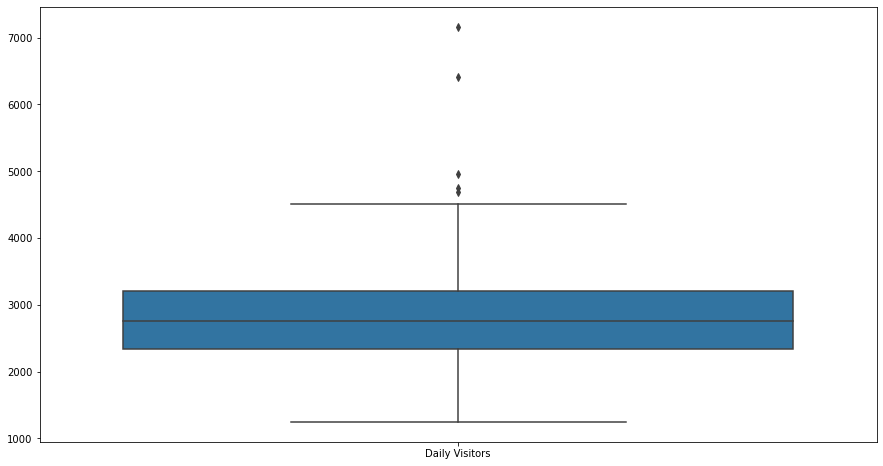

In [7]:
#Vizuvalizing outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=dt1)
plt.show()

In [8]:
Q1=dt1['Daily Visitors'].quantile(0.25)
Q3=dt1['Daily Visitors'].quantile(0.75)
Q1, Q3

(2336.0, 3207.0)

In [9]:
IQR=Q3-Q1
IQR

871.0

In [10]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(1029.5, 4513.5)

In [11]:
dt2=dt1[(dt1['Daily Visitors']>lower_limit)&(dt1['Daily Visitors']<upper_limit)]
dt2.shape

(168, 1)

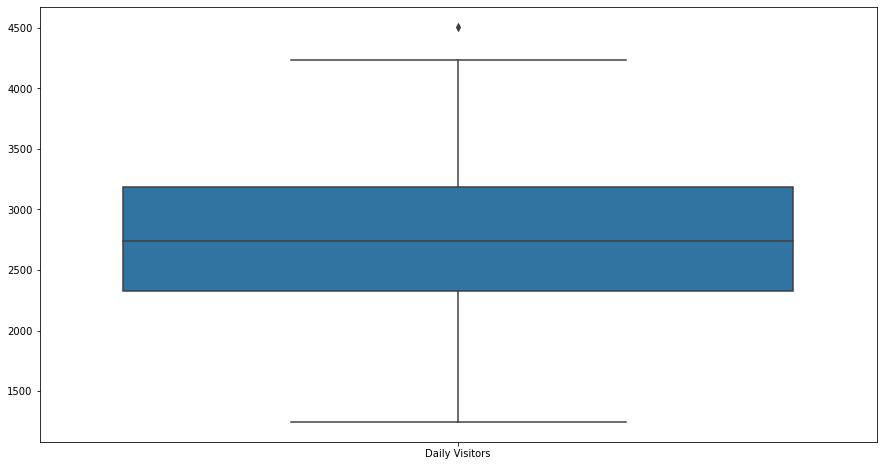

In [12]:
#Vizuvalizing outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=dt2)
plt.show()

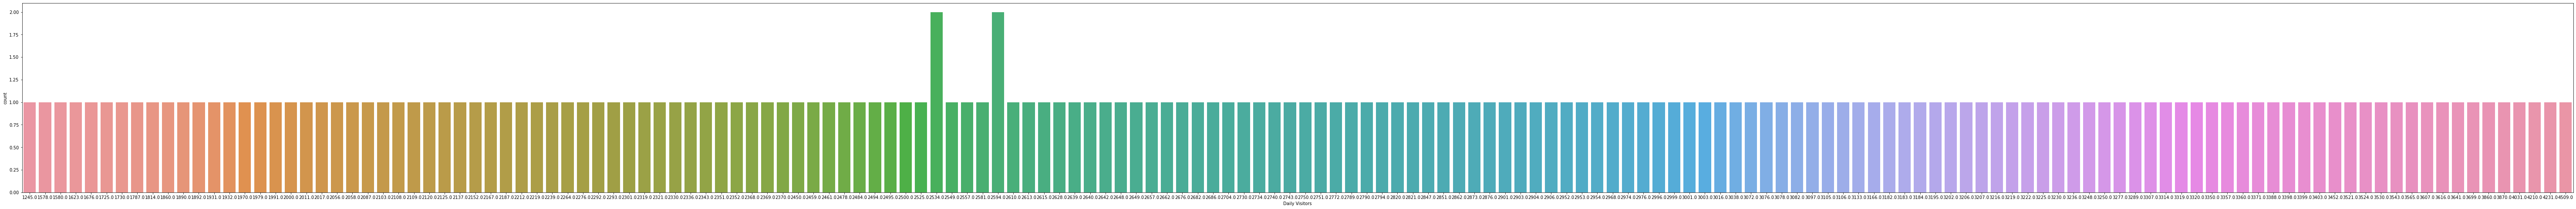

In [13]:
#Countplot for daily visitors
plt.figure(figsize=(105,8))
sns.countplot(x='Daily Visitors',data=dt2)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
# split the data into train and test set
train, test = train_test_split(dt2, test_size=0.2, random_state=3, shuffle=True)

In [15]:
train

,Daily Visitors
Date,
2022-09-03,3072.0
2021-12-17,2276.0
2022-08-02,2999.0
2021-10-13,2851.0
2021-10-15,1578.0
...,...
2021-10-22,3016.0
2021-01-10,2649.0
2022-09-02,2790.0


In [16]:
#sample of 5 observations
train.sample(5)

,Daily Visitors
Date,
2022-03-19,2976.0
2022-01-18,3184.0
2022-03-20,2534.0
2022-02-03,4231.0
2022-08-01,2292.0


In [17]:
#sample of 5 observations
test.sample(5)

,Daily Visitors
Date,
2021-10-11,3195.0
2022-03-15,3524.0
2021-12-22,2330.0
2021-10-26,3207.0
2021-12-13,2682.0


In [18]:
train

,Daily Visitors
Date,
2022-09-03,3072.0
2021-12-17,2276.0
2022-08-02,2999.0
2021-10-13,2851.0
2021-10-15,1578.0
...,...
2021-10-22,3016.0
2021-01-10,2649.0
2022-09-02,2790.0


In [19]:
train.index

DatetimeIndex(['2022-09-03', '2021-12-17', '2022-08-02', '2021-10-13',
               '2021-10-15', '2021-10-25', '2021-12-11', '2022-01-24',
               '2021-09-10', '2021-12-18',
               ...
               '2022-01-28', '2022-04-03', '2022-02-16', '2022-01-16',
               '2022-02-03', '2021-10-22', '2021-01-10', '2022-09-02',
               '2022-07-03', '2022-01-15'],
              dtype='datetime64[ns]', name='Date', length=134, freq=None)

In [20]:
print("missing_data:", train.isna().sum())
print("unique dates:", train.index.nunique())

missing_data: Daily Visitors    0
dtype: int64
unique dates: 134


In [21]:
#Counting number of values for each quarter and Year. Columns are quarters. Rows are years. 
#Here each quarter and year have 1 value, thus no duplicate values.
pd.crosstab(index=train.index.year, columns=train.index.quarter)

col_0,1,2,3,4
row_0,,,,
2021,8,5,7,50
2022,43,7,8,6


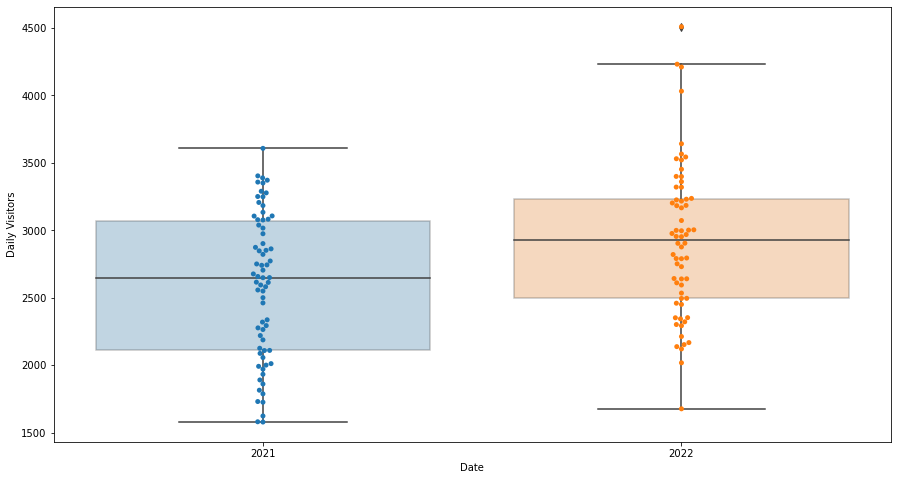

In [22]:
#box plot to see distribution of sales in each year
plt.figure(figsize=(15,8))
sns.boxplot(data=train, x=train.index.year, y = 'Daily Visitors', boxprops=dict(alpha=.3));
sns.swarmplot(data=train, x=train.index.year, y = 'Daily Visitors');

In [23]:
#%Growth of each year.
growth = train[:'2022'].groupby(train[:'2022'].index.year)["Daily Visitors"].sum().pct_change()
growth*100

Date
2021        NaN
2022    3.07381
Name: Daily Visitors, dtype: float64

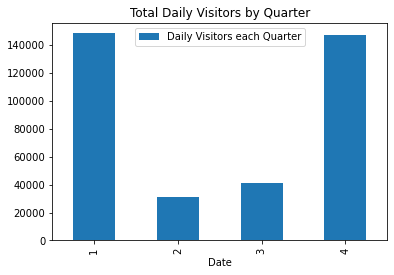

In [24]:
# plt.figure(figsize=(15,8))
pie= train[:'2022'].groupby(train[:'2022'].index.quarter)["Daily Visitors"].sum().plot.bar(title="Total Daily Visitors by Quarter", legend=True, label="Daily Visitors each Quarter")

# Auto Regressive Integrated Moving Average (ARIMA)

In [25]:
#Groupby Daily Visitors by Quarter

#Only use upto 2022 
train_2022=train[:'2022']
avg_2022= np.int(train[:'2022'].mean())

#Avg Daily Visitors per quarter
qrt_avg=train_2022.groupby(train_2022.index.quarter)["Daily Visitors"].mean()

#Groupby quarter
qrt_table = pd.pivot_table(train_2022, index=train_2022.index.quarter, columns=train_2022.index.year)

#add qrt_avg to qrt_table
qrt_table["avg"] = qrt_avg

#Additive Seasonality Factor: Subtract mean from avg column
qrt_table["additive"] = qrt_table["avg"]-avg_2022

#Multiplicative Seasonality Factor: Subtract mean from avg column
qrt_table["multiplicative"] = (qrt_table["avg"]/avg_2022).round(2)

qrt_table.index.name="Quarters"

qrt_table

Daily Visitors                       avg    additive multiplicative
Date               2021         2022                                        
Quarters                                                                    
1           2534.500000  2982.511628  2912.235294  164.235294           1.06
2           2264.800000  2876.571429  2621.666667 -126.333333           0.95
3           2651.714286  2824.500000  2743.866667   -4.133333           1.00
4           2624.180000  2661.000000  2628.125000 -119.875000           0.96

Mean is: 2748.634328358209


<Figure size 1080x576 with 0 Axes>

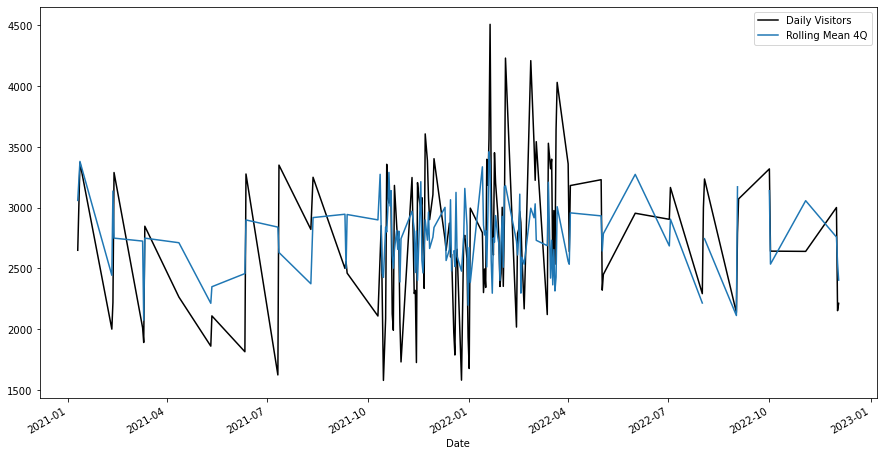

In [26]:
plt.figure(figsize=(15,8))
train.plot(figsize=(15,8), legend=True, label="Train", cmap='gray')
train["Daily Visitors"].rolling(4, center=False).mean().plot(legend=True, label="Rolling Mean 4Q");
print("Mean is:", train["Daily Visitors"].mean())

S.D is: 572.5121733091266


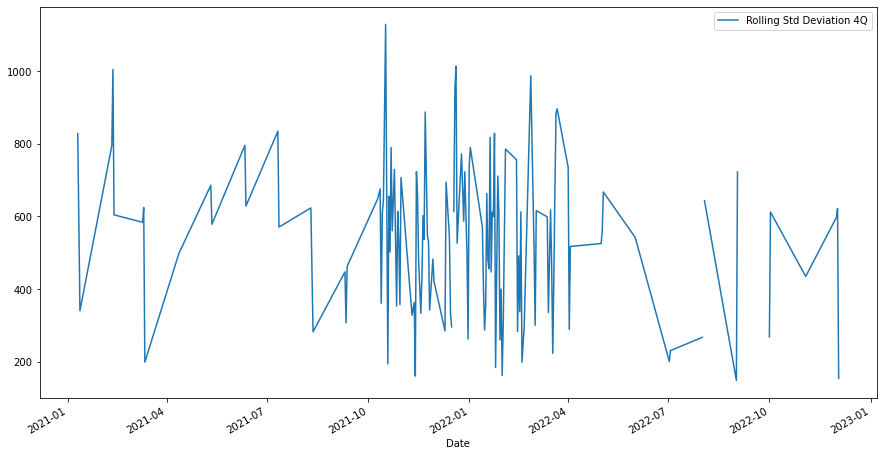

In [27]:
plt.figure(figsize=(15,8))
train["Daily Visitors"].rolling(4).std().plot(legend=True, label="Rolling Std Deviation 4Q");
print("S.D is:", train["Daily Visitors"].std())

In [28]:
cv = train["Daily Visitors"].std()/train["Daily Visitors"].mean()
cv

0.2082896831355136

In [29]:
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot

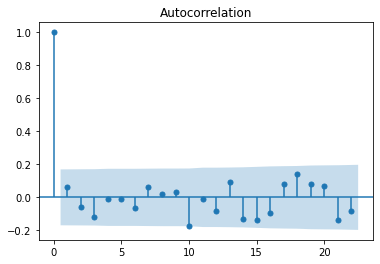

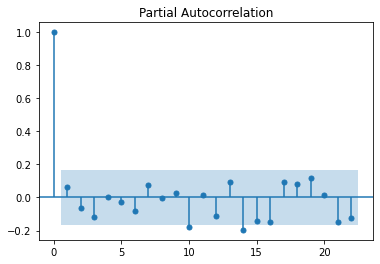

In [30]:
#Plot ACF and PACF using statsmodels
plot_acf(train);
plot_pacf(train);

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
#Calculate ad fuller statistic
adf = adfuller(train["Daily Visitors"])[1]
print(f"p value:{adf.round(4)}", ", Series is Stationary" if adf <0.05 else ", Series is Non-Stationary")

p value:0.0 , Series is Stationary


p value:3.0187324355134235e-10 , Series is Stationary


<Figure size 1080x576 with 0 Axes>

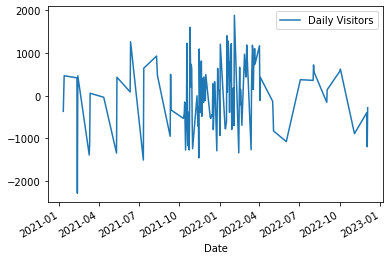

In [33]:
#De-trending
plt.figure(figsize=(15,8))
de_trended = train.diff(1).dropna()
adf2 = adfuller(de_trended)[1]
print(f"p value:{adf2}", ", Series is Stationary" if adf2 <0.05 else ", Series is Non-Stationary")
de_trended.plot();

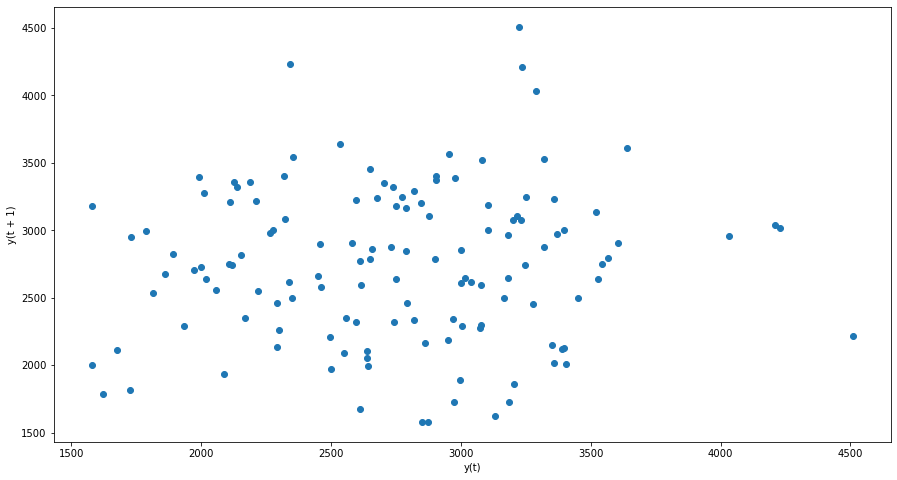

In [34]:
plt.figure(figsize=(15,8))
pd.plotting.lag_plot(train["Daily Visitors"],1);

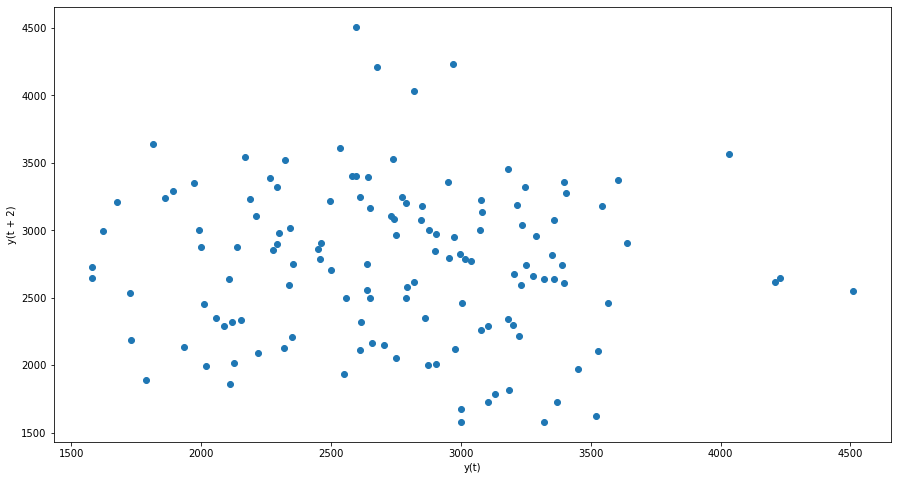

In [35]:
plt.figure(figsize=(15,8))
pd.plotting.lag_plot(train["Daily Visitors"],2);

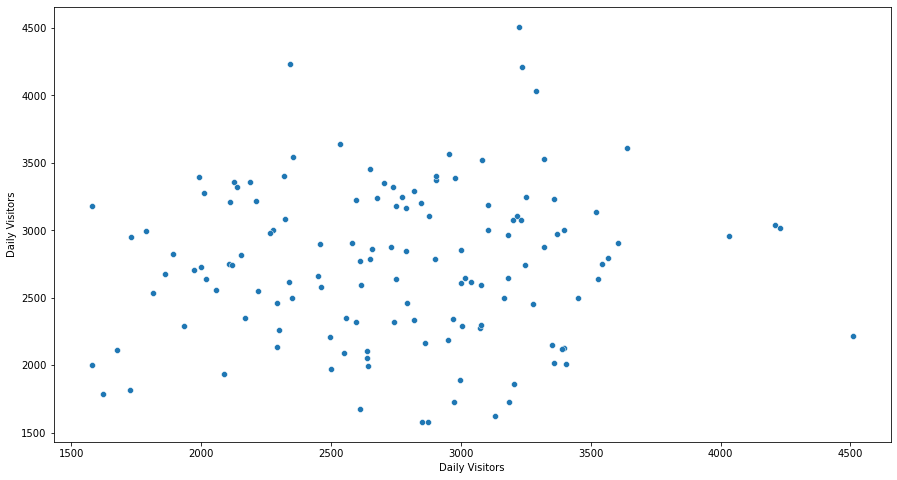

In [36]:
plt.figure(figsize=(15,8))
sns.scatterplot(train["Daily Visitors"], train["Daily Visitors"].shift(-1));

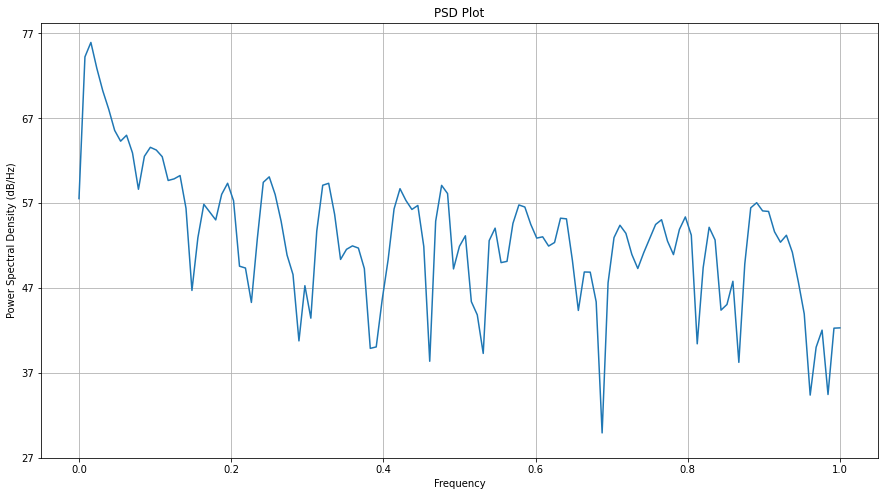

In [37]:
plt.figure(figsize=(15,8))
#Plot PSD
plt.psd(train["Daily Visitors"], detrend='linear');
plt.title("PSD Plot");

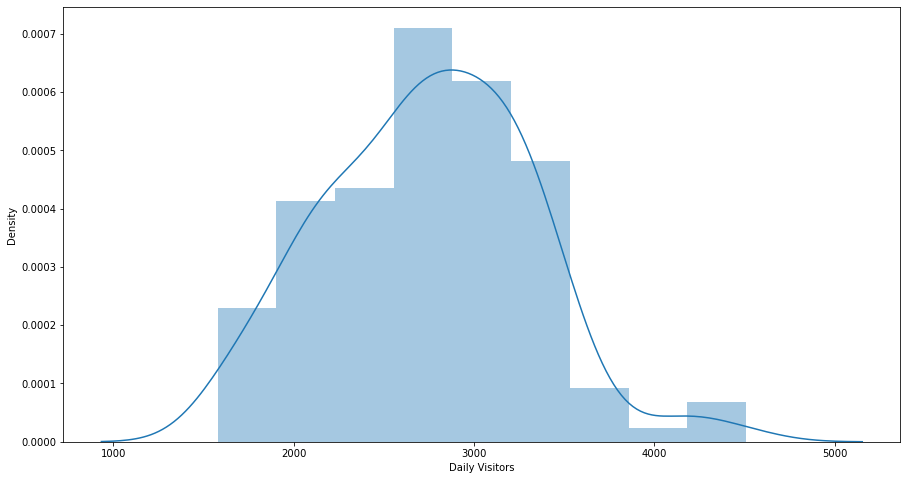

In [38]:
#Distribution Plot
plt.figure(figsize=(15,8))
sns.distplot(train["Daily Visitors"]);

In [39]:
#Jarque Bera Stastical Test for Normality
from scipy.stats import jarque_bera as jb
is_norm=jb(train["Daily Visitors"])[1]
print(f"p value:{is_norm.round(2)}", ", Series is Normal" if is_norm >0.05 else ", Series is Non-Normal")

p value:0.7 , Series is Normal


# Holt Winter’s Exponential Smoothing (HWES)

In [40]:
#counting the number of missing values
df = (dt['Daily Visitors']).isnull()
df

0      False
1      False
2      False
3      False
4      False
       ...  
168    False
169    False
170    False
171    False
172    False
Name: Daily Visitors, Length: 173, dtype: bool

<AxesSubplot:xlabel='Daily Visitors'>

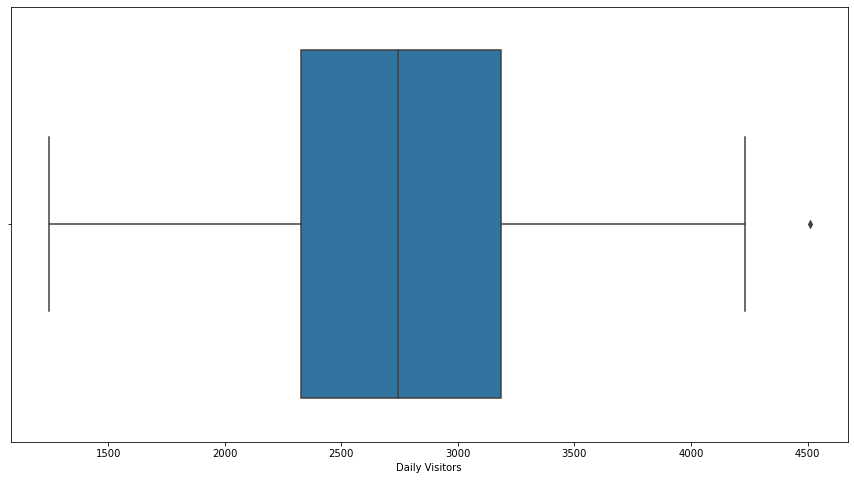

In [41]:
#Outlier detection and treatment
plt.figure(figsize=(15,8))
sns.boxplot(x= dt2['Daily Visitors'])

In [42]:
#calculating the z score
dt2['z_score'] = dt2['Daily Visitors'] - dt2['Daily Visitors'].mean()/dt2['Daily Visitors'].std(ddof=0)

In [43]:
from scipy import stats

In [44]:
#exclude the row with z score more than 3
dt2[(np.abs(stats.zscore(dt2['z_score'])) < 3)]

,Daily Visitors,z_score
Date,,
2021-01-10,2649.0,2644.253789
2021-02-10,2000.0,1995.253789
2021-03-10,2011.0,2006.253789
2021-04-10,3219.0,3214.253789
2021-05-10,3870.0,3865.253789
...,...,...
2022-03-18,2494.0,2489.253789
2022-03-19,2976.0,2971.253789
2022-03-20,2534.0,2529.253789


In [45]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<AxesSubplot:title={'center':'Visitors'}, xlabel='Date'>

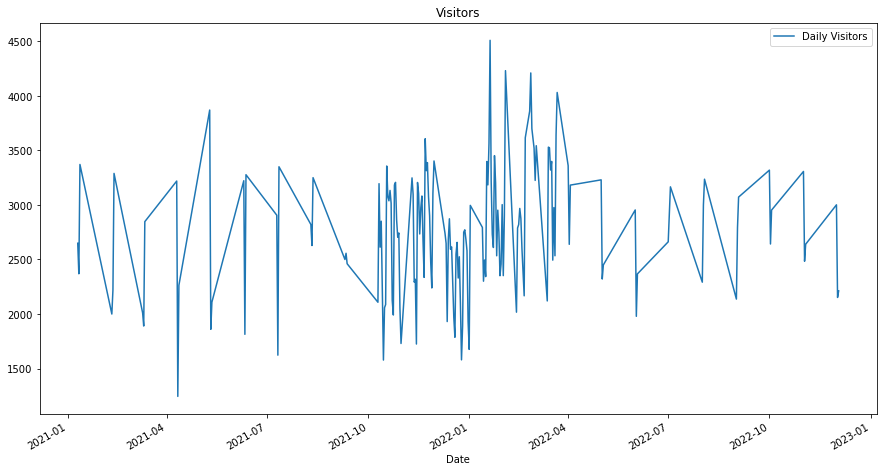

In [47]:
plt.rcParams["figure.figsize"] = (15,8)
dt2[['Daily Visitors']].plot(title='Visitors')

In [48]:
# sort the data as per the index
dt2.sort_index(inplace=True) 

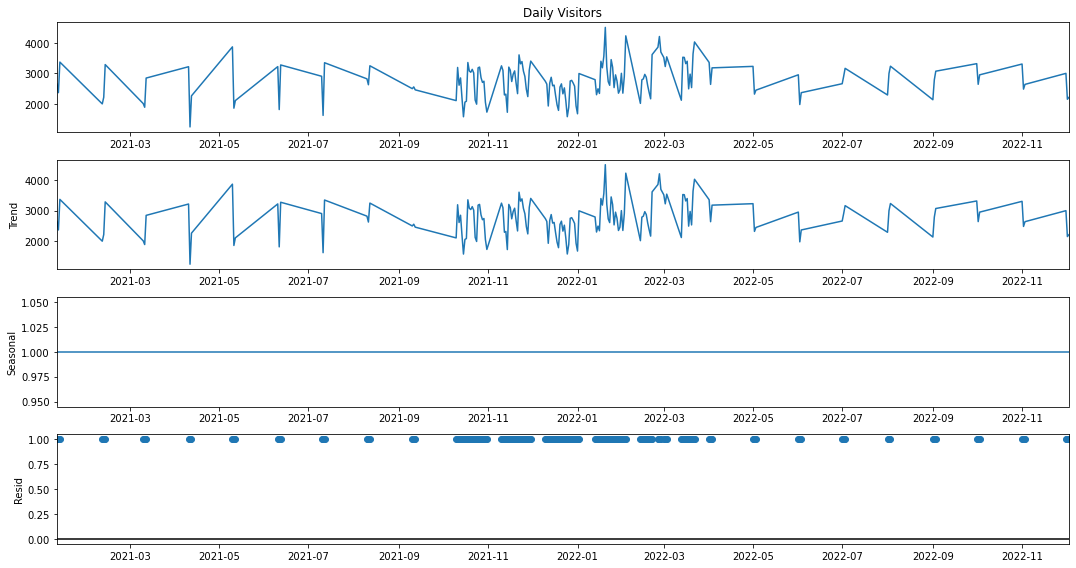

In [49]:
# Decompose the data frame to get the trend, seasonality and noise
plt.rcParams["figure.figsize"] = (15,8)
decompose_result = seasonal_decompose(dt2['Daily Visitors'],model='multiplicative',period=1)
decompose_result.plot()
plt.show()

In [50]:
# Set the value of Alpha and define x as the time period
x = 175
alpha = 1/(2*x)

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing grpah'}, xlabel='Date'>

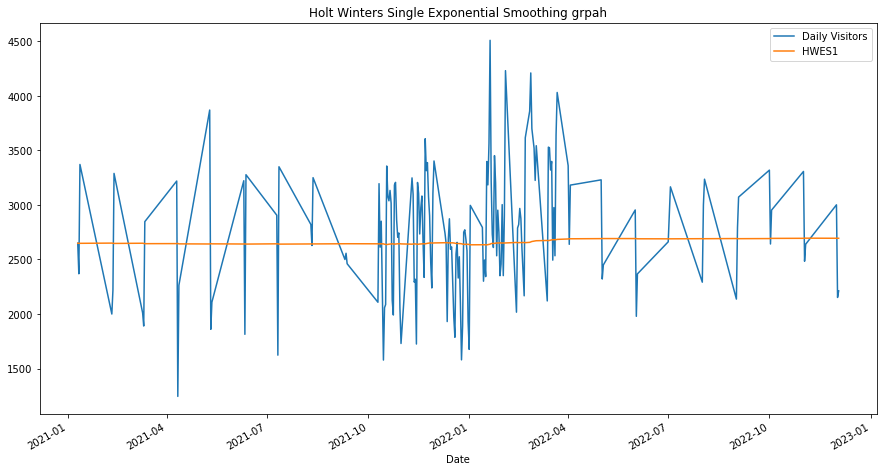

In [51]:
# Single exponential smoothing of the visitors data set
plt.rcParams["figure.figsize"] = (15,8)
dt2['HWES1'] = SimpleExpSmoothing(dt2['Daily Visitors']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues      
dt2[['Daily Visitors','HWES1']].plot(title='Holt Winters Single Exponential Smoothing grpah')

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<AxesSubplot:title={'center':'Holt Winters grapg: Additive Trend and Multiplicative Trend'}, xlabel='Date'>

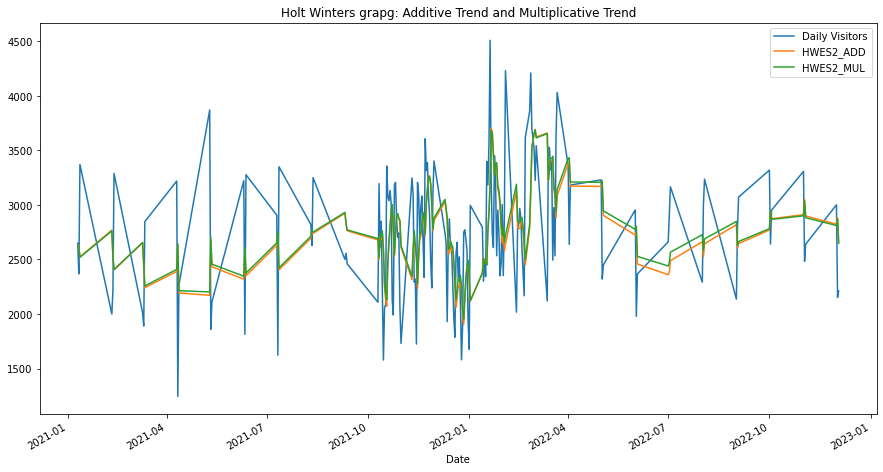

In [52]:
# Double exponential smoothing of visitors data set ( Additive and multiplicative)
plt.rcParams["figure.figsize"] = (15,8)
dt2['HWES2_ADD'] = ExponentialSmoothing(dt2['Daily Visitors'],trend='add').fit().fittedvalues
dt2['HWES2_MUL'] = ExponentialSmoothing(dt2['Daily Visitors'],trend='mul').fit().fittedvalues
dt2[['Daily Visitors','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters grapg: Additive Trend and Multiplicative Trend')

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


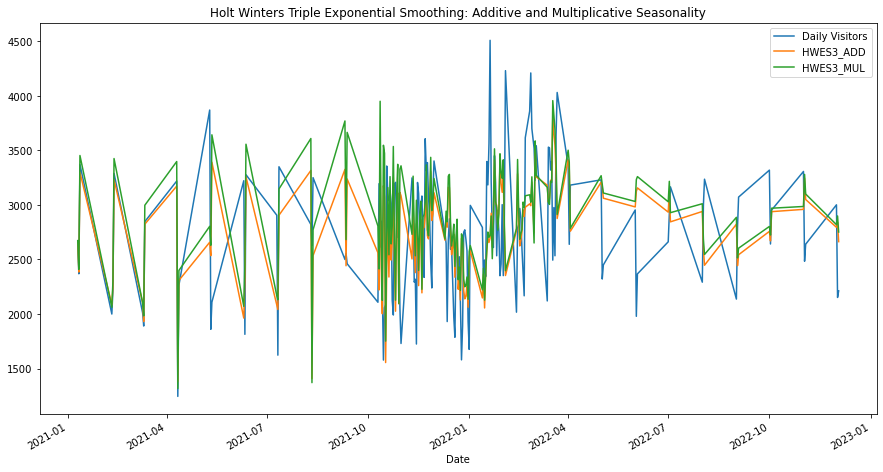

In [53]:
dt2['HWES3_ADD'] = ExponentialSmoothing(dt2['Daily Visitors'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

dt2['HWES3_MUL'] = ExponentialSmoothing(dt2['Daily Visitors'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

dt2[['Daily Visitors','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');


# Moving Average(MA)

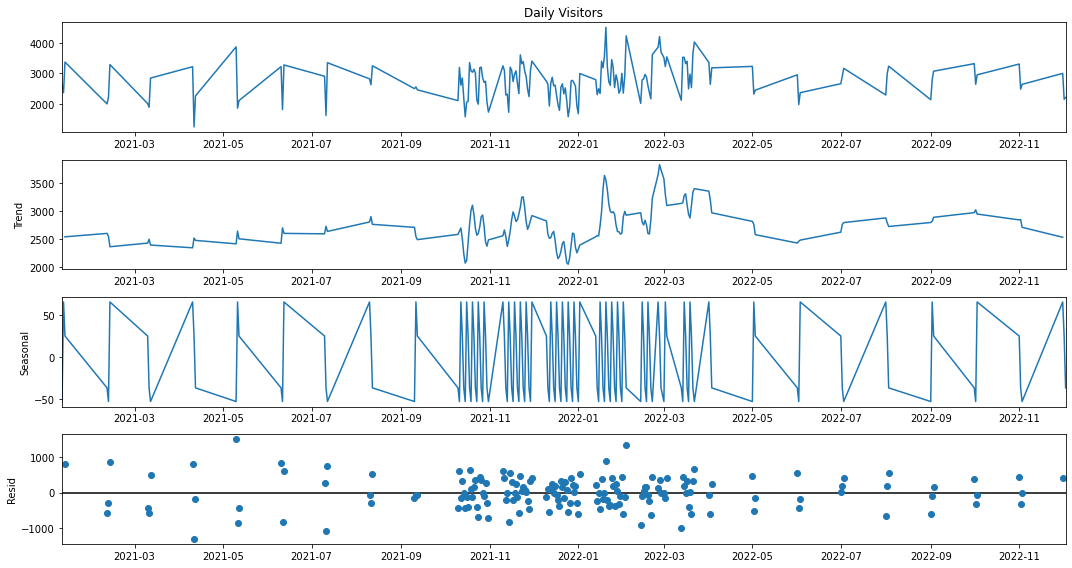

In [54]:
#Additive model decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
import  statsmodels.api as sm
decomp_dt2 = sm.tsa.seasonal_decompose(dt2['Daily Visitors'], model="additive", freq=4)
decomp_dt2.plot()
plt.show()

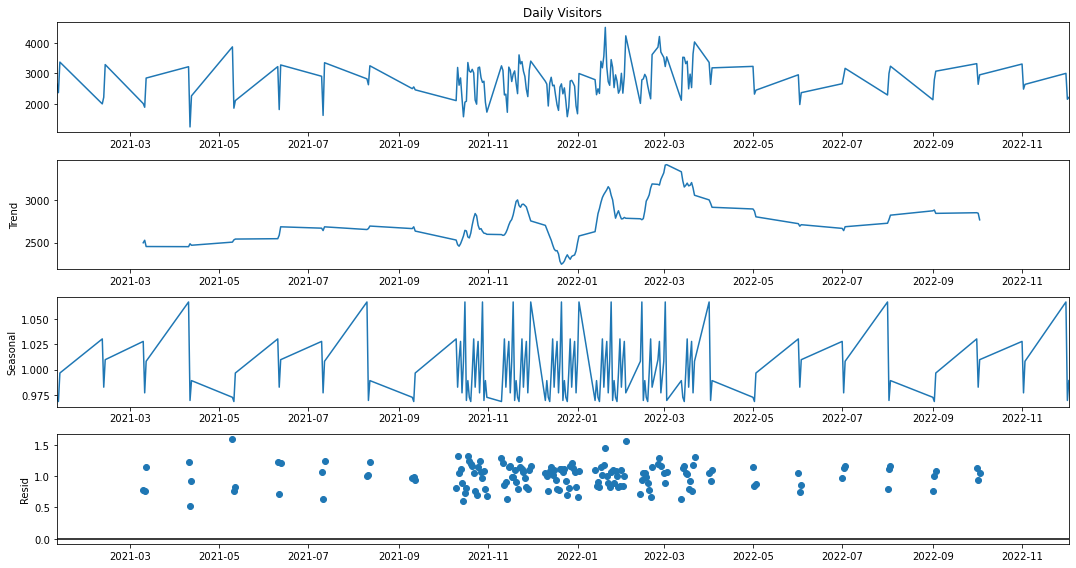

In [55]:
#multiplicative model decomposition
decomp_dt2_m = sm.tsa.seasonal_decompose(dt2['Daily Visitors'], model="multiplicative", freq=12)
decomp_dt2_m.plot()
plt.show()

No handles with labels found to put in legend.


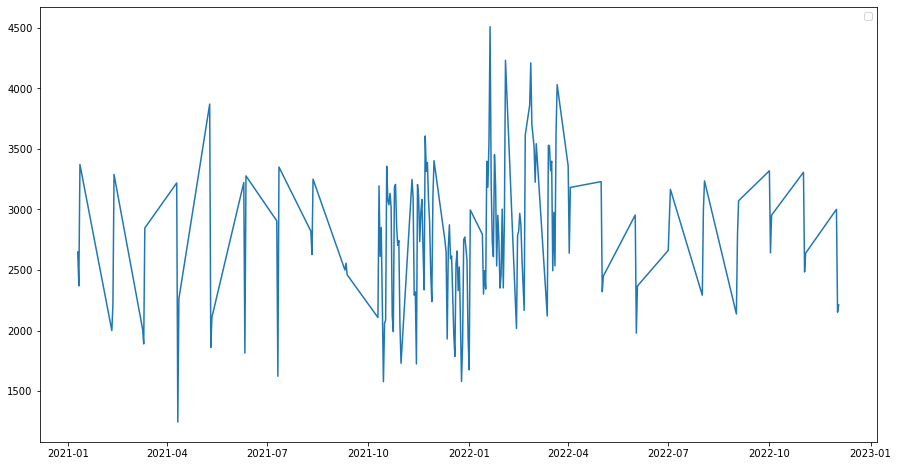

In [56]:
#Average forcasting 
plt.plot(dt2['Daily Visitors'])
plt.legend(loc='best')
plt.show()

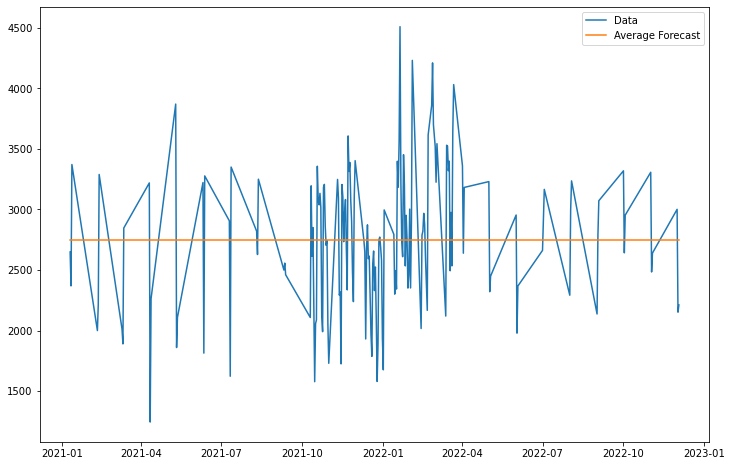

In [57]:
# Mean Average forcasting 
mean_avg = dt2.copy()
mean_avg['avg_forecast'] =dt2['Daily Visitors'].mean()

plt.figure(figsize=(12,8))
plt.plot(dt2['Daily Visitors'], label='Data')
plt.plot(mean_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

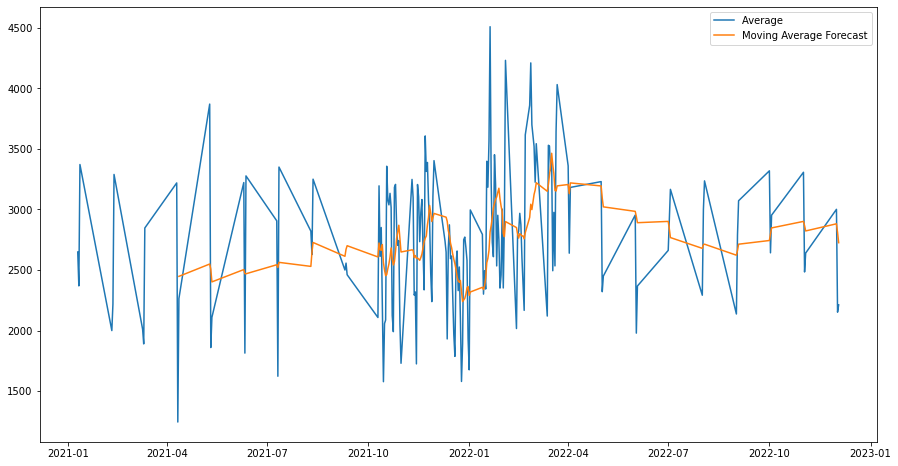

In [58]:
#Moving average forcasting
mvg_avg = dt2.copy()
mvg_avg['moving_avg_forecast'] = dt2['Daily Visitors'].rolling(12).mean()
plt.plot(dt2['Daily Visitors'], label='Average ')
plt.plot(mvg_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

# Auto Regression (AR)

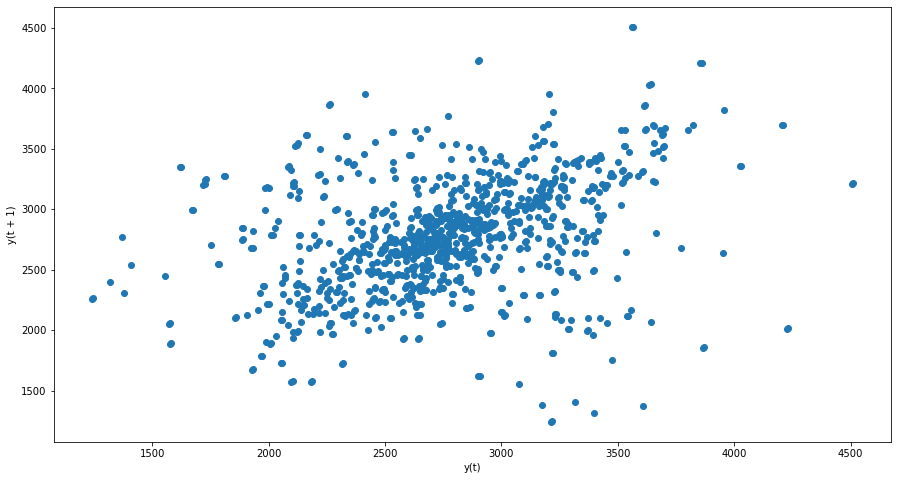

In [59]:
#Quick Check for Autocorrelation

from pandas.plotting import lag_plot
lag_plot(dt2)
plt.show()

#### We can see observations along a diagonal line of the plot. It clearly shows a relationship or some correlation.

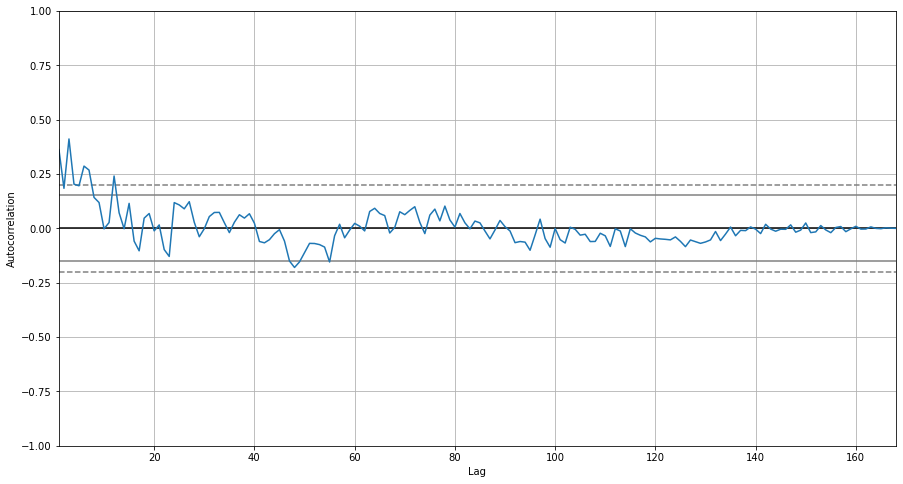

In [60]:

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(dt2)
plt.show()

In [61]:
#Vector Auto Regression

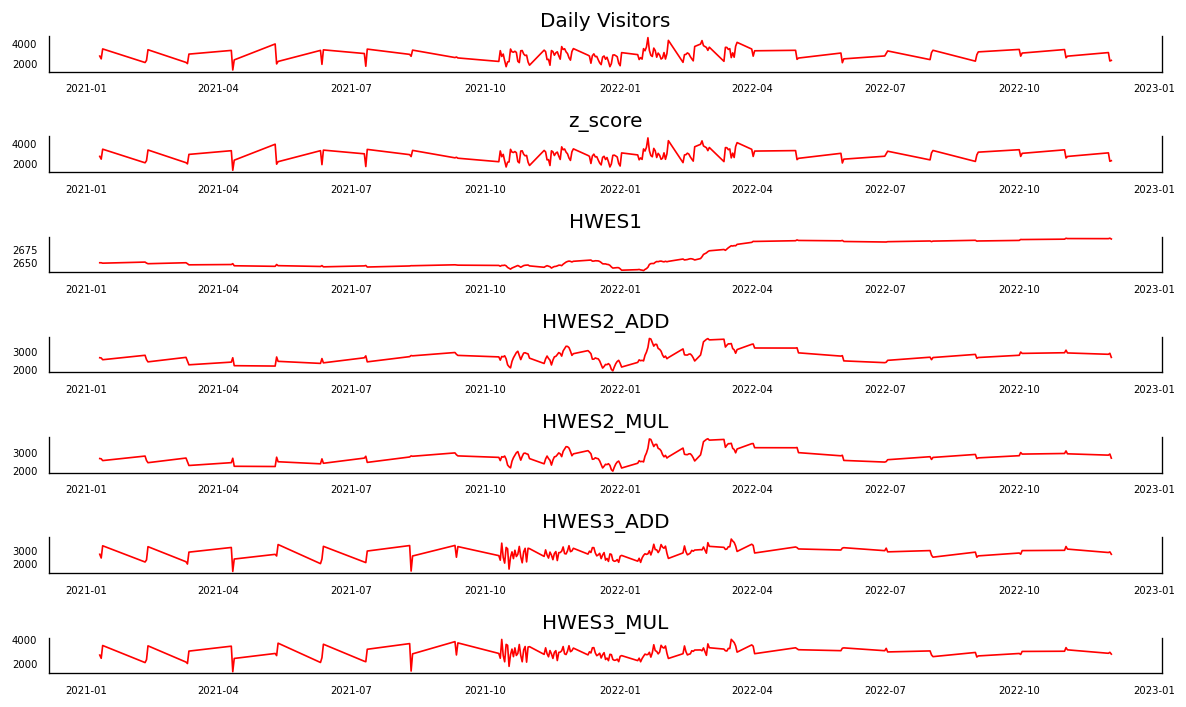

In [62]:
# Plot
fig, axes = plt.subplots(nrows=7, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = dt2[dt2.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(dt2.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Seasonal Auto Regressive Integrated Moving Average (SARIMA)

In [63]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(train)

In [64]:
adf

-10.721597937579965

In [65]:
pvalue

3.1406461713409584e-19

In [66]:
usedlag_

0

In [67]:
 nobs_

133

In [68]:
critical_values_

{'1%': -3.480500383888377,
 '5%': -2.8835279559405045,
 '10%': -2.578495716547007}

In [69]:
icbest_

1868.3962633351532

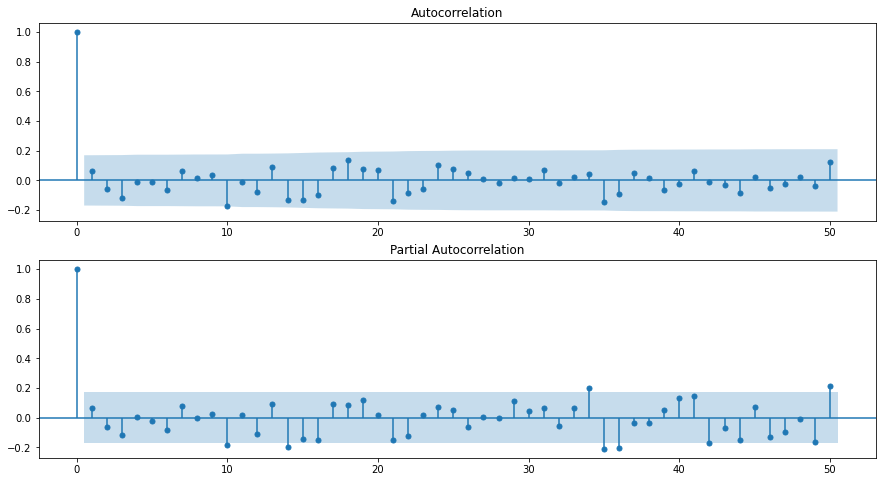

In [70]:
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(train, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(train, lags=50, ax=ax[1])
plt.show()

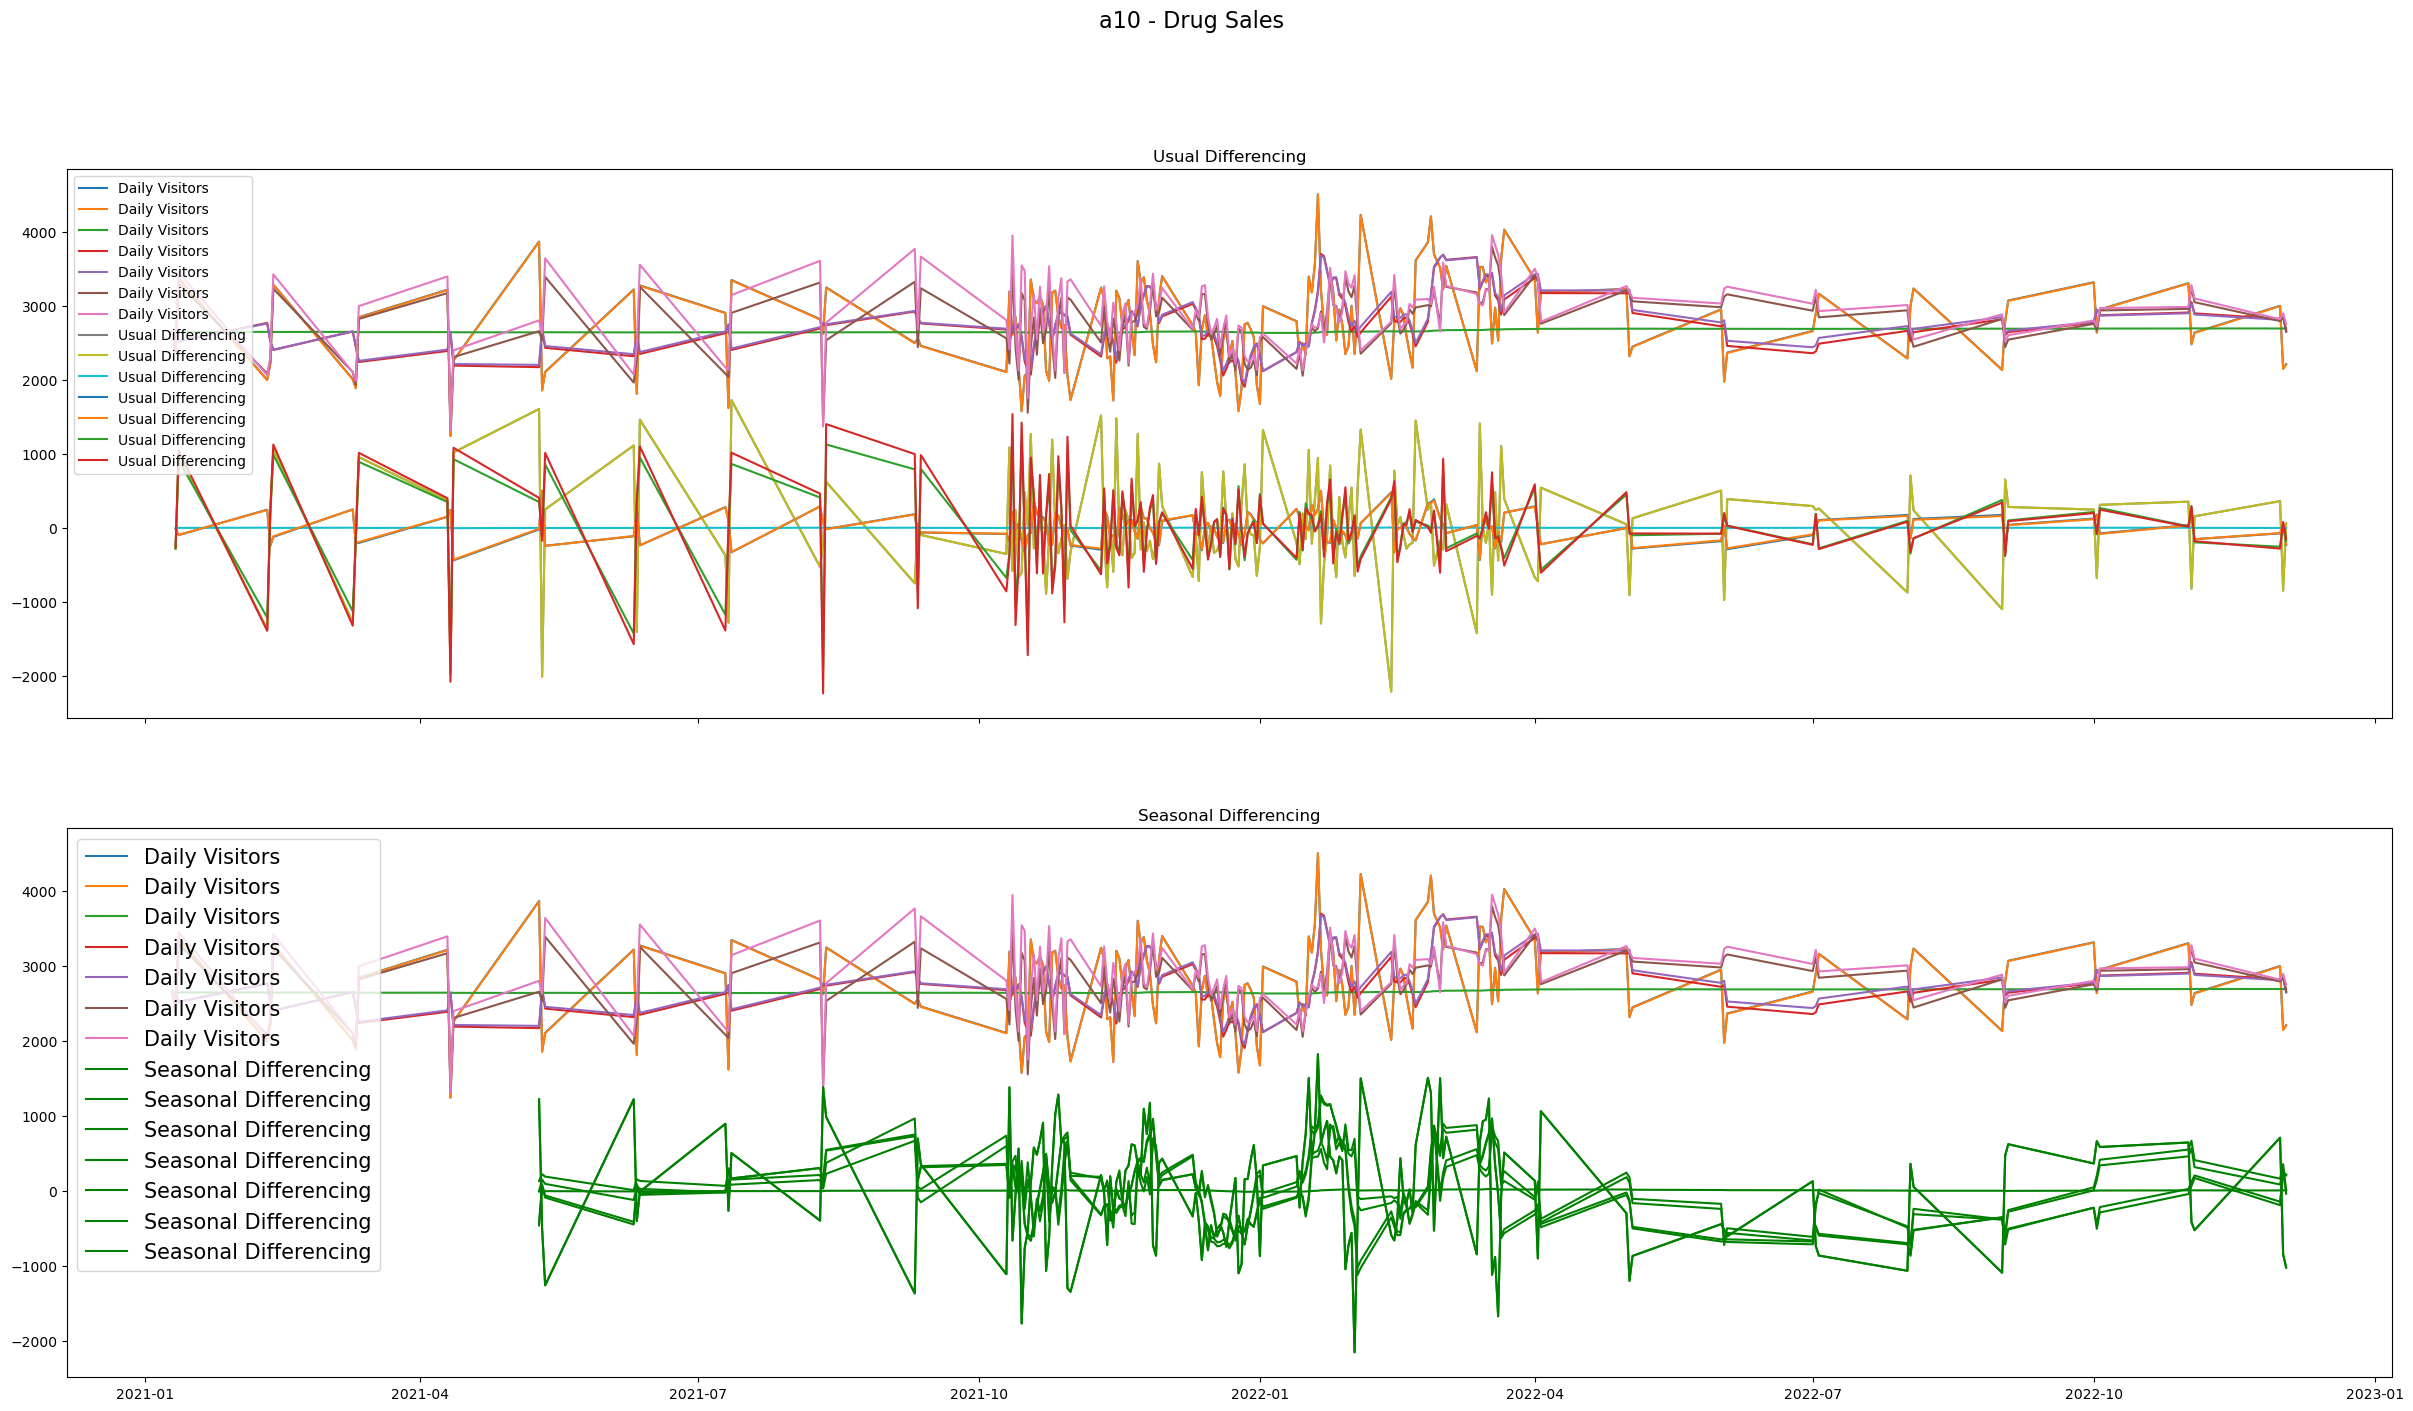

In [71]:
plt.rcParams["figure.figsize"] = (30,16)
# Plot
fig, axes = plt.subplots(2, 1, dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(dt2[:], label='Daily Visitors')
axes[0].plot(dt2[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(dt2[:], label='Daily Visitors')
axes[1].plot(dt2[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=15)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

In [72]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(dt2['Daily Visitors'], order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:       D.Daily Visitors   No. Observations:                  167
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1286.795
Method:                       css-mle   S.D. of innovations            528.454
Date:                Thu, 21 Apr 2022   AIC                           2583.590
Time:                        13:33:49   BIC                           2599.180
Sample:                             1   HQIC                          2589.918
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.5582      0.997      2.566      0.010       0.604       4.512
ar.L1.D.Daily Visitors    -0.6208      0.081     -7.696      0.000      -0.779      -0.463
ma.L

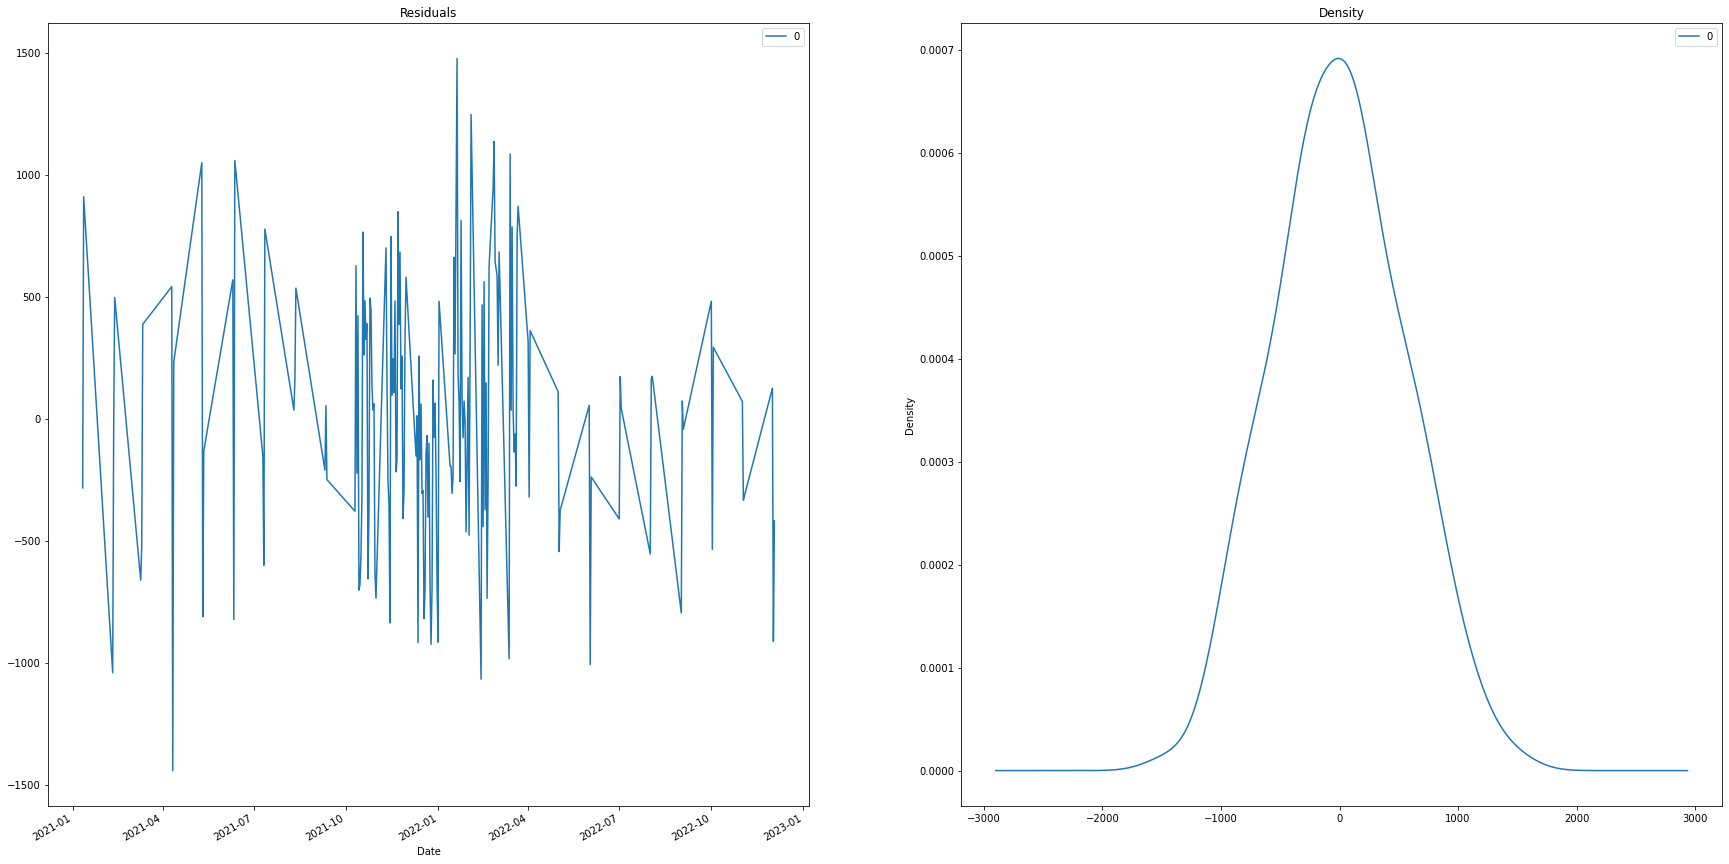

In [73]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

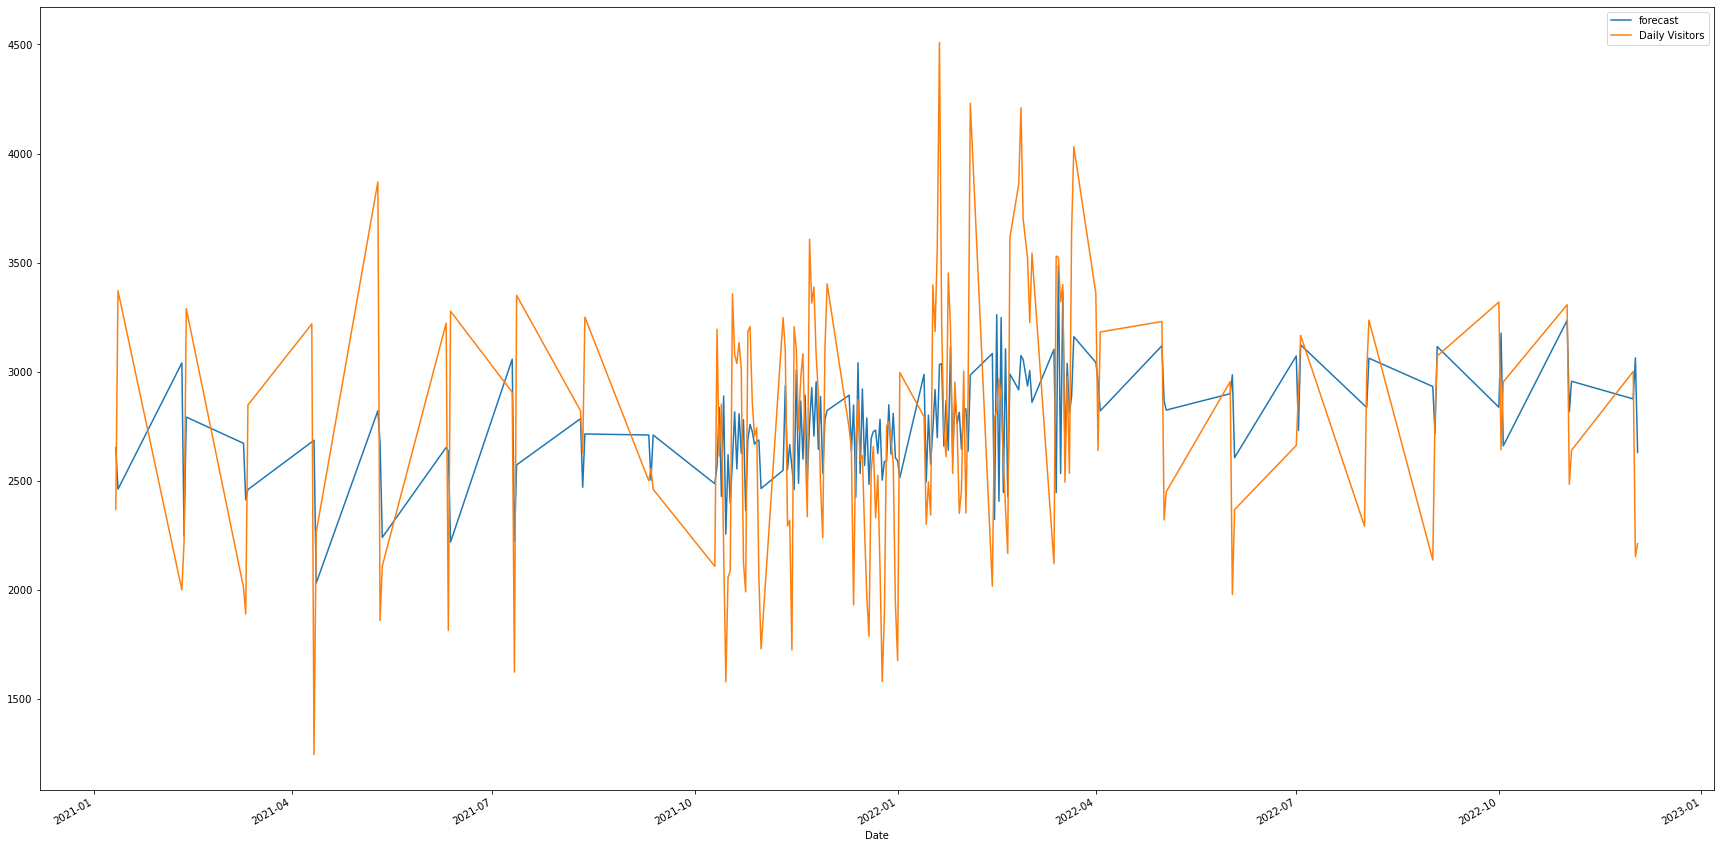

In [74]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()


In [75]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [76]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=3230.000, Expected=3076.000
>Predicted=3076.000, Expected=2594.000
>Predicted=2594.000, Expected=3225.000
>Predicted=3225.000, Expected=4509.000
>Predicted=4509.000, Expected=2219.000
>Predicted=2219.000, Expected=2549.000
>Predicted=2549.000, Expected=2087.000
>Predicted=2087.000, Expected=1932.000
>Predicted=1932.000, Expected=2292.000
>Predicted=2292.000, Expected=2137.000
>Predicted=2137.000, Expected=3320.000
>Predicted=3320.000, Expected=2873.000
>Predicted=2873.000, Expected=1580.000
>Predicted=1580.000, Expected=2000.000
>Predicted=2000.000, Expected=2730.000
>Predicted=2730.000, Expected=2876.000
>Predicted=2876.000, Expected=3105.000
>Predicted=3105.000, Expected=3003.000
>Predicted=3003.000, Expected=2293.000
>Predicted=2293.000, Expected=2459.000
>Predicted=2459.000, Expected=2901.000
>Predicted=2901.000, Expected=2789.000
>Predicted=2789.000, Expected=2847.000
>Predicted=2847.000, Expected=3202.000
>Predicted=3202.000, Expected=3078.000
>Predicted=3078.000, Expe

In [77]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    X = train.values
    X = X.astype('float32')

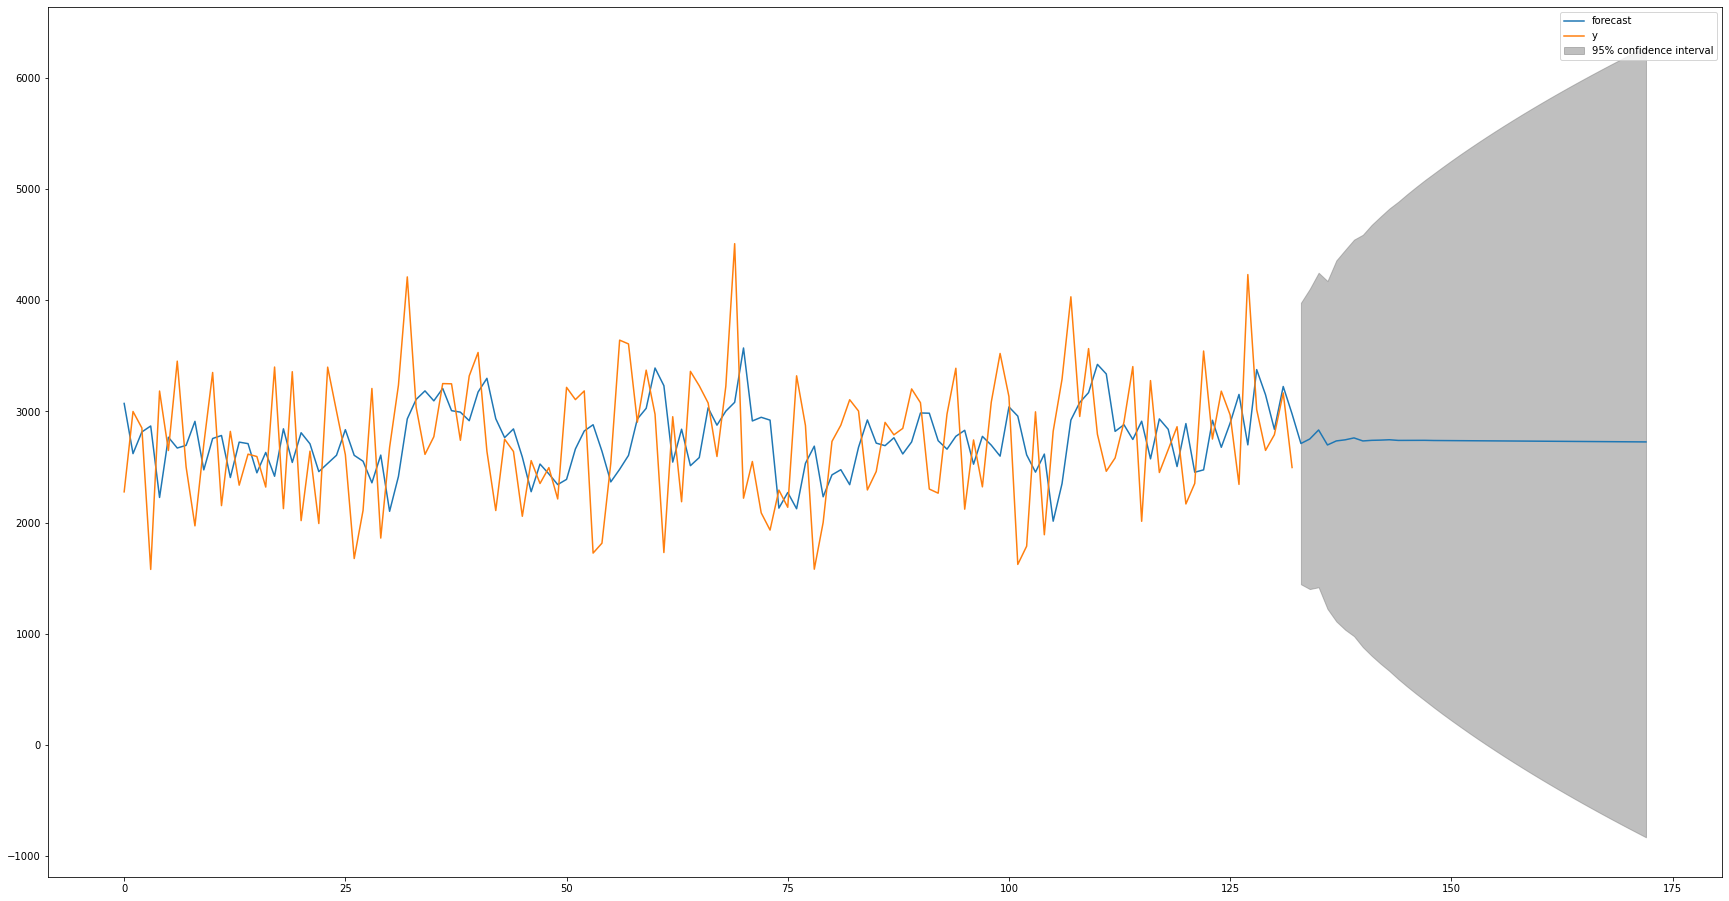

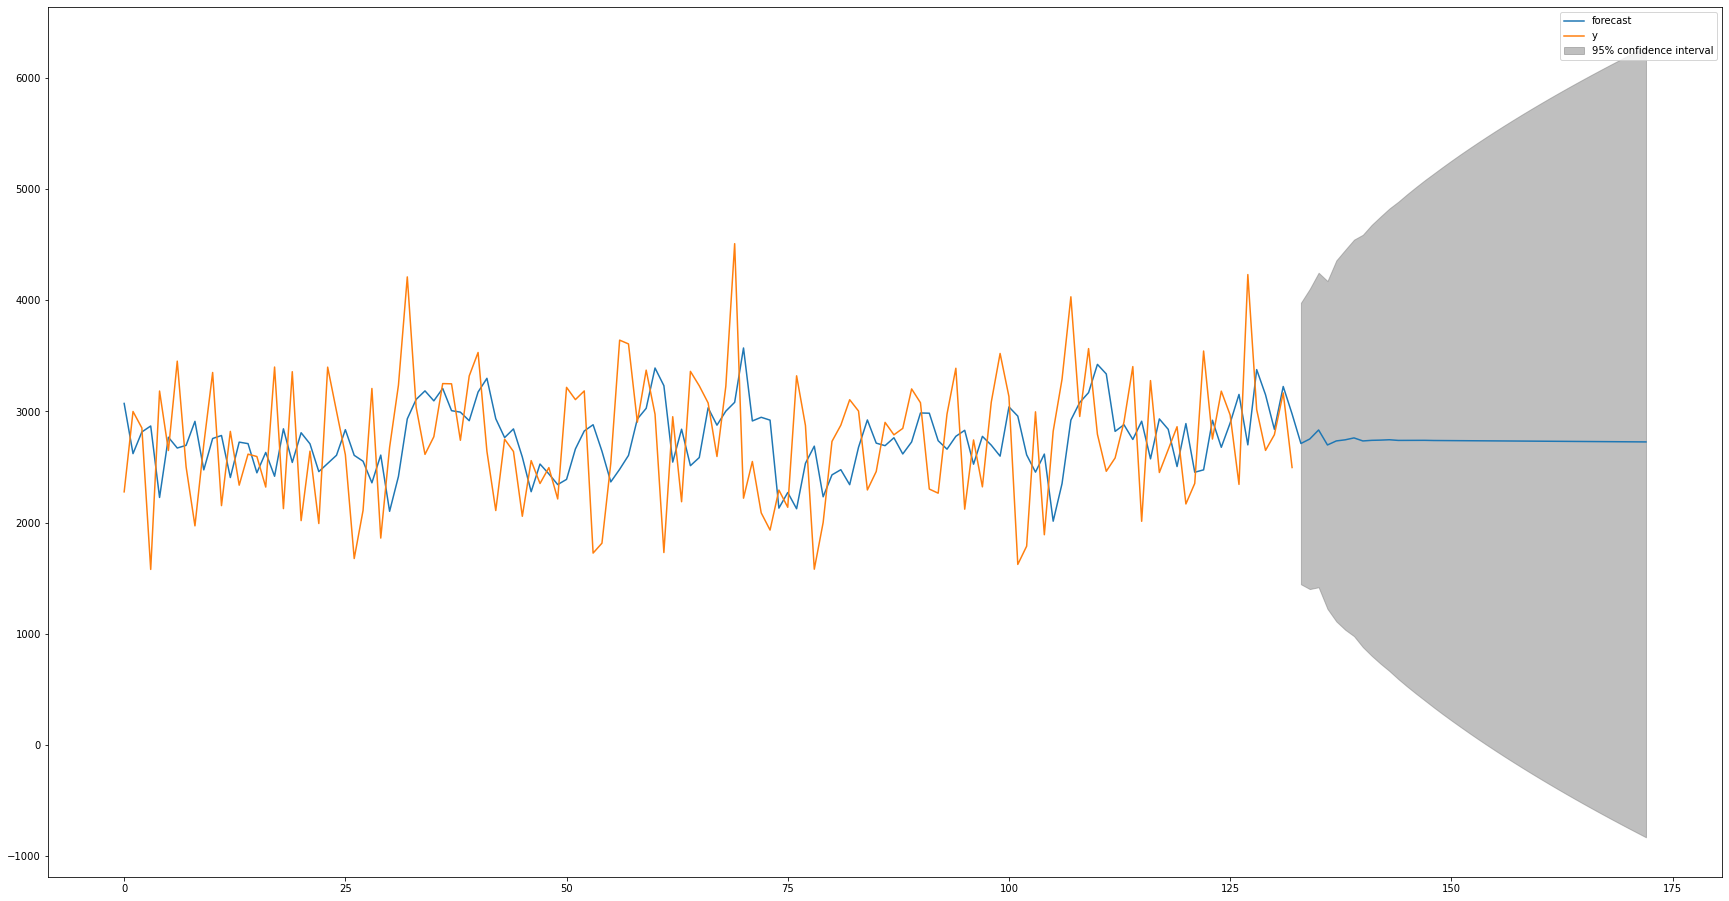

In [78]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,173)

In [79]:
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()

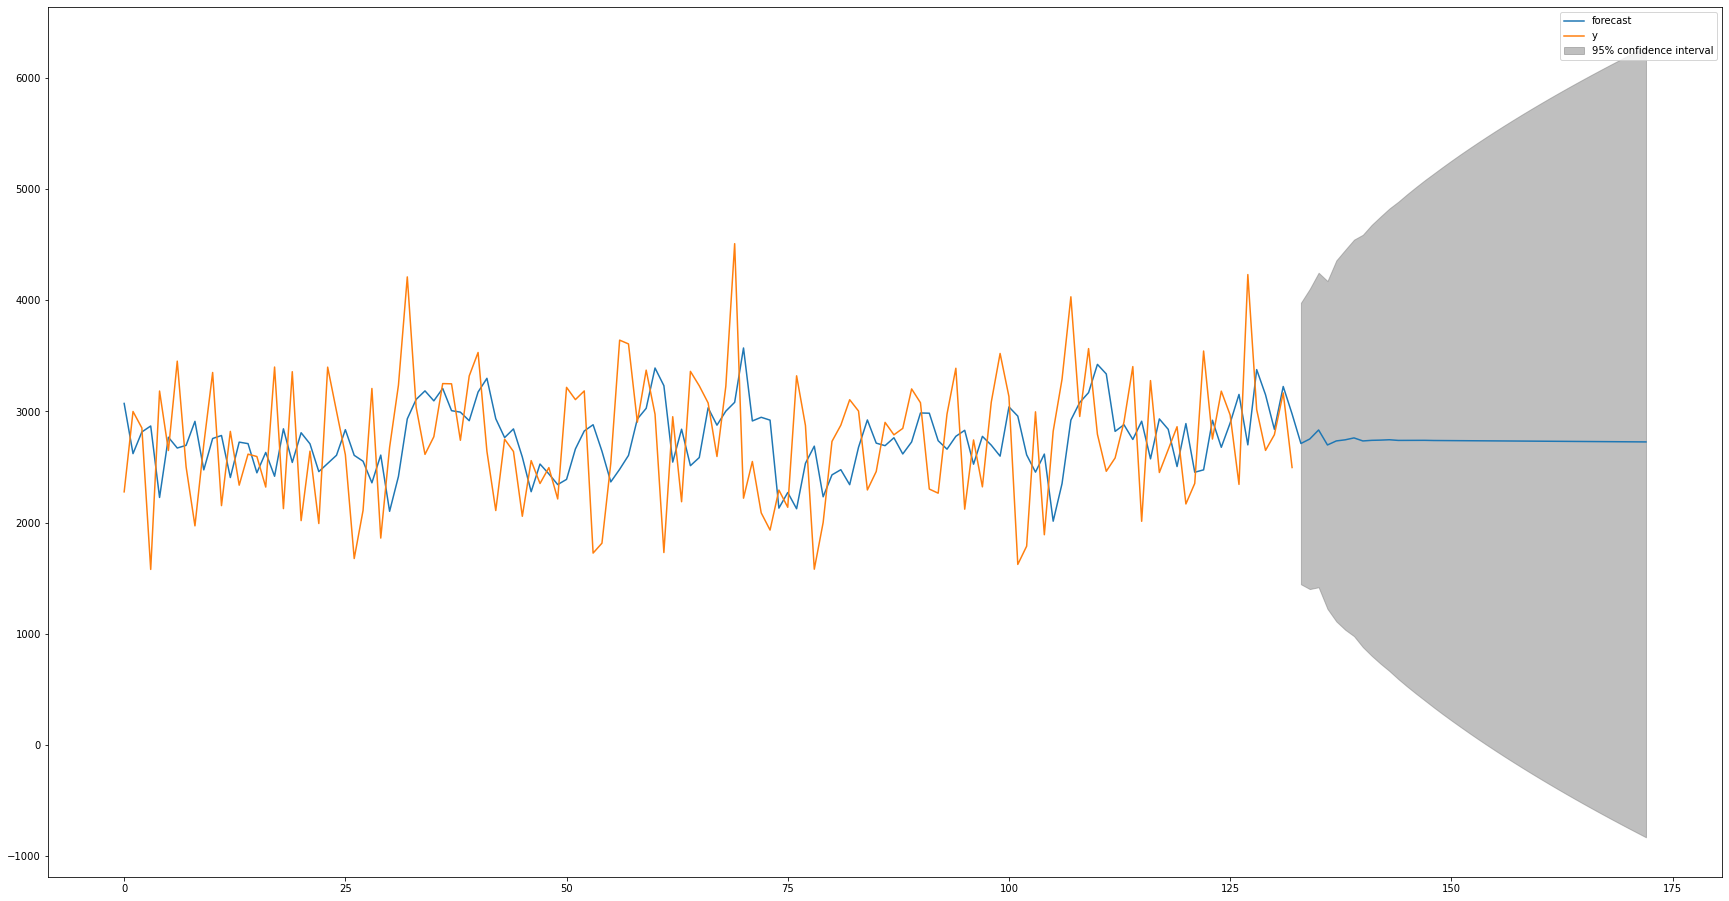

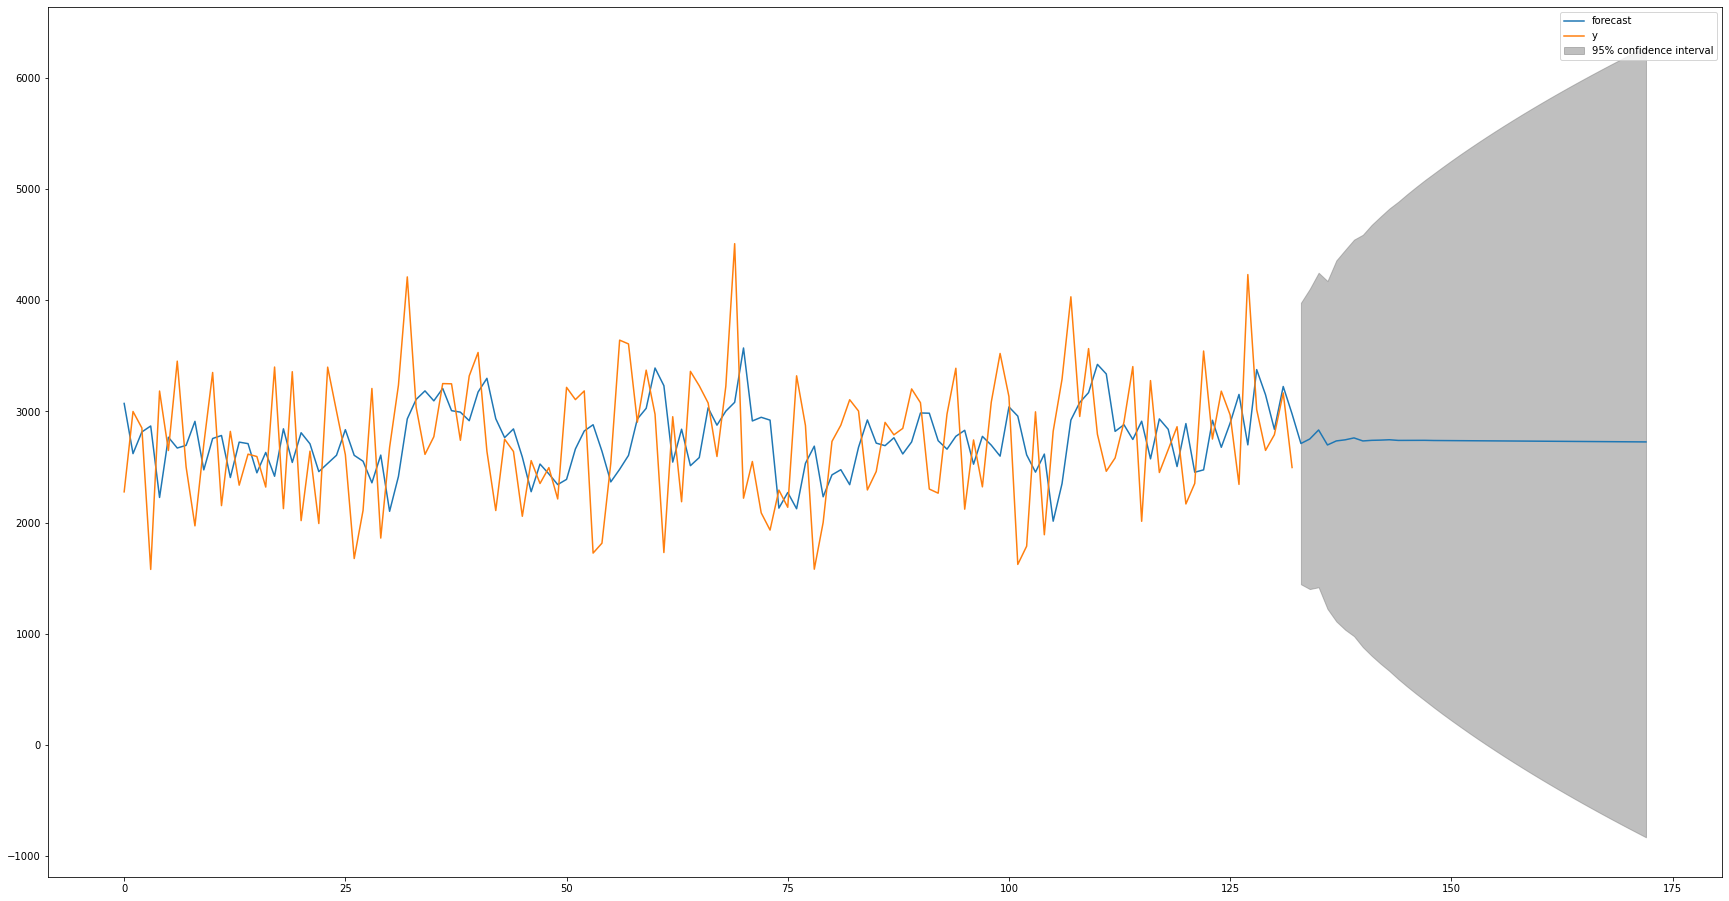

In [80]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,173)

In [81]:
forecast

array([2710.97055569, 2751.58856293, 2832.61087717, 2697.85445778,
       2734.12136255, 2744.07454658, 2761.27060269, 2733.95648567,
       2739.43371874, 2741.37682008])

In [82]:
#Error on the test data
rmse = np.mean((forecast - test)**2)**.5  # RMS
rmse

575.4377232795999

In [83]:
#Accuracies
mape = np.mean(np.abs(forecast - test)/np.abs(test))  # MAPE
me = np.mean(forecast - test)             # ME
mae = np.mean(np.abs(forecast - test))    # MAE
mpe = np.mean((forecast - test)/test)   # MPE
ARIMA__rmse = np.mean((forecast - test)**2)**.5  # RMSE

In [84]:
ARIMA__rmse

575.4377232795999

In [85]:
mpe

0.03626883614926785

In [86]:
me

-24.438380116520133

In [87]:
mae

451.08946917290666

In [88]:
mape

0.17364041275363482

# AR

In [89]:
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

window =0
model = AutoReg(train, lags=0)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
AR_rmse = sqrt(mean_squared_error(test, predictions))
print('AR RMSE: %.3f' % rmse)


predicted=2728.104478, expected=3076.000000
predicted=2728.104478, expected=2594.000000
predicted=2728.104478, expected=3225.000000
predicted=2728.104478, expected=4509.000000
predicted=2728.104478, expected=2219.000000
predicted=2728.104478, expected=2549.000000
predicted=2728.104478, expected=2087.000000
predicted=2728.104478, expected=1932.000000
predicted=2728.104478, expected=2292.000000
predicted=2728.104478, expected=2137.000000
predicted=2728.104478, expected=3320.000000
predicted=2728.104478, expected=2873.000000
predicted=2728.104478, expected=1580.000000
predicted=2728.104478, expected=2000.000000
predicted=2728.104478, expected=2730.000000
predicted=2728.104478, expected=2876.000000
predicted=2728.104478, expected=3105.000000
predicted=2728.104478, expected=3003.000000
predicted=2728.104478, expected=2293.000000
predicted=2728.104478, expected=2459.000000
predicted=2728.104478, expected=2901.000000
predicted=2728.104478, expected=2789.000000
predicted=2728.104478, expected=

In [90]:
#Compare the results 

data = {"MODEL":pd.Series(['ARIMA__rmse','AR_rmse']),"RMSE_Values":pd.Series([ARIMA__rmse,AR_rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,AR_rmse,575.371475
0,ARIMA__rmse,575.437723


In [92]:
import streamlit as st
import pandas as pd
import numpy as np
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric
import base64

st.title('📈 Automated Time Series Forecasting')

"""
This data app uses Facebook's open-source Prophet library to automatically generate future forecast values from an imported dataset.
You'll be able to import your data from a CSV file, visualize trends and features, analyze forecast performance, and finally download the created forecast 😵 
**In beta mode**
"""

"""
### Step 1: Import Data
"""
df = st.file_uploader('Website Vistiors Daywise.csv')

if df is not None:
    data = pd.read_csv('Website Vistiors Daywise.csv')
    data['ds'] = pd.to_datetime(data['ds']) 
    
    st.write(data)
    
    max_date = data['ds'].max()
    #st.write(max_date)

"""
### Step 2: Select Forecast Horizon
Keep in mind that forecasts become less accurate with larger forecast horizons.
"""

periods_input = st.number_input('How many periods would you like to forecast into the future?',min_value = 1, max_value = 365)

if df is not None:
    m = Prophet()
    m.fit(data)

"""
### Step 3: Visualize Forecast Data
The below visual shows future predicted values. "yhat" is the predicted value, and the upper and lower limits are (by default) 80% confidence intervals.
"""
if df is not None:
    future = m.make_future_dataframe(periods=periods_input)
    
    forecast = m.predict(future)
    fcst = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    fcst_filtered =  fcst[fcst['ds'] > max_date]    
    st.write(fcst_filtered)
    
    """
    The next visual shows the actual (black dots) and predicted (blue line) values over time.
    """
    fig1 = m.plot(forecast)
    st.write(fig1)

    """
    The next few visuals show a high level trend of predicted values, day of week trends, and yearly trends (if dataset covers multiple years). The blue shaded area represents upper and lower confidence intervals.
    """
    fig2 = m.plot_components(forecast)
    st.write(fig2)


"""
### Step 4: Download the Forecast Data
The below link allows you to download the newly created forecast to your computer for further analysis and use.
"""
if df is not None:
    csv_exp = fcst_filtered.to_csv(index=False)
    # When no file name is given, pandas returns the CSV as a string, nice.
    b64 = base64.b64encode(csv_exp.encode()).decode()  # some strings <-> bytes conversions necessary here
    href = f'<a href="data:file/csv;base64,{b64}">Download CSV File</a> (right-click and save as ** &lt;forecast_name&gt;.csv**)'
    st.markdown(href, unsafe_allow_html=True)